# CS 168- Homework 1


### Load and rotate an image

In [2]:
import scipy
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import imageio
from matplotlib import pyplot as plt
from time import time
img=imageio.imread('./phantom.png')[:,:,0]

plt.figure()
plt.imshow(img, cmap='gray')

print('The shape of the phantom image is: {} '.format(np.shape(img)))

The shape of the phantom image is: (512, 512) 


 Rotate the image for 72 degrees ( not Radian ), and visualize the results. 
 
 Implement your work in the code cell below.

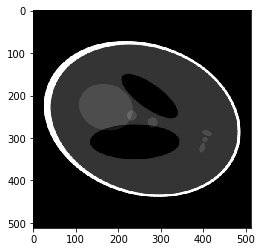

In [3]:
from skimage.transform import rotate
plt.imshow(rotate(img, 72), cmap='gray')

### Radon Transform and sonogram

The basic problem of tomography is given a set of 1-D projections and the angles at which the projections were taken how can we reconstruct a 2-D image.

We define the 1-D projection $g(\phi, s)$ at angle $\phi$ and is dinstance s from the origin. Then the radon transform is

$$g(t, \theta) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}f(x, y)\delta(xcos\theta + ysin\theta -t)dxdy$$




Using scikit-image package, apply the radon transform and obtain a sonogram of the image. Visualize the results. 

Look at the documentation for radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.radon). 

Implement your work in the following code block

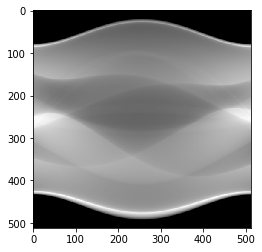

In [4]:
from skimage.transform import radon
angle = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram = radon(img, theta=angle, circle=True)
plt.imshow(sinogram, cmap='gray')

Implement a sinogram function here from scratch. You are not allowed to use any external packages and can only take advantage of numpy. Visualize the results.

Implement your work in the following code block ( complete the function and plot the results ) 



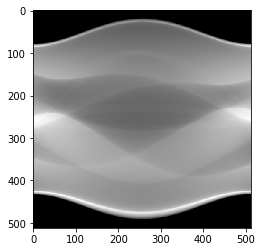

In [5]:
def sinogram_radon(img):
    row=img.shape[0]
    sinogram = np.zeros(shape=(row,row))
    for s in range(row):
        rotation = rotate(img, -s*180/row)
        sinogram[:,s] = sum(rotation)
     
    return sinogram
plt.imshow(sinogram_radon(img), cmap='gray')



### Backprojection and Inverse Radon Transform

Using scikit-image package, apply the inverse radon transform and obtain the reconstructed image from the  sonogram that was generated from your own implementation ( from scratch) . Visualize the results.

Look at the documentation for the inverse radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.iradon). 

As an input to this function, use the sinogram generated by the package. 

Implement your work in the following code block.

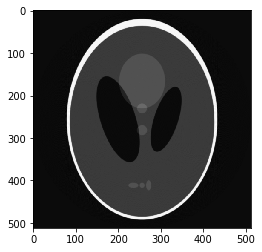

In [6]:
from skimage.transform import iradon
recover=iradon(radon(img, theta=angle, circle=True), theta=angle,
circle=True)
plt.imshow(recover, cmap='gray')

Plot the reconstruction error and use the provided MSE function to calculate the mean squared error between the original and reconstructed image. 

18.67218229889381


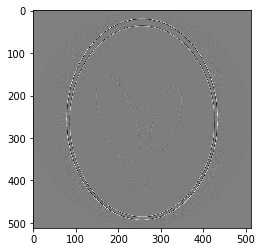

In [7]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err
print(mse(img, recover))
plt.imshow(recover - img, cmap='gray')


Implement the backprojection algorithm from scratch. You are not allowed to use any packages and can only take advantage of numpy. Visualize the results.

As an input to this function, use the sinogram generated by the scikit-image radon function. 

Implement your work in the following code block ( complete the function and plot the results ). 

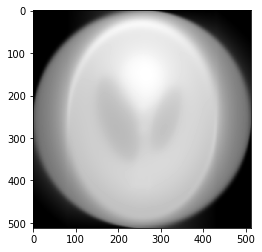

In [9]:
def backproj_iradon(projection):
    rows = len(projection)
    img1 = np.zeros(shape=(rows, len(projection)))
    for s in range(rows):
        img1 = rotate(img1, -1*180/rows)
        img1 += projection[:,s]
    img1 = rotate(img1, 180)
    
    img1 -= sum(sum(projection))
    img1 /= (rows-1)
    return img1
    
something = backproj_iradon(sinogram_radon(img))
plt.imshow(something, cmap='gray')

Plot the reconstruction error and use the provided MSE function to calculate the mean squared error between the original and reconstructed image. Compare your results with results generated by using iradon function in skimage.


1087850356.8220644


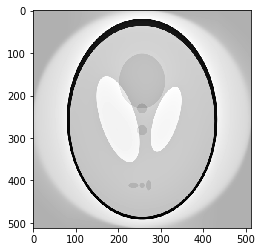

In [10]:
print(mse(img, something))
plt.imshow(something - img, cmap='gray')